In [131]:
class BeanCount:
    def __init__(self, export_file_path: str):
        self.test_l = [f"/t{i:02d}" for i in range(1, 31)]
        self.image_l = [f"/{i}.jpg" for i in range(1,6)]
        self.option = 0
        self.image_path_list = []
        self.open_count_label_path = "./01/System/data/count_open.txt"
        self.start_time = 0
        self.end_time = 0
        self.open_label = []
        self.hidden_label = []
        self.count_res = []
        self.linear_model_fn = None
        self.hidden_count_label_path = "./01/System/data/count_hidden.txt"
        self.export_file_path = export_file_path

    # path = "./Open" or "./Hidden"
    def getImagePath(self, path):
        image_path_list = []

        test_path_l = [path+i for i in self.test_l]
        image_path_list.extend([j+self.image_l[self.option-1] for j in test_path_l])
        return image_path_list


    def getArea(self, image_path_list):
        image_pixel_count_list = []
        for img_path in image_path_list:
            src=cv2.imread(img_path)
            dst = self.getAboveTargetImg(src) if self.option==5 else self.getSideTargetImg(src)
            dst1 = self.hsvRGB2Binary(dst)
            fg = self.erasingNoise(dst1)
            image_pixel_count_list.append(sum(sum(fg)))
        return image_pixel_count_list


    def getAboveTargetImg(self, src):
        rc = (621, 300, 2988, 2700)
        dst = src[rc[1]:rc[1]+rc[3], rc[0]:rc[0]+rc[2]]
        return dst


    def getSideTargetImg(self, src):
        rc = (975, 909, 2555, 999)
        dst = src[rc[1]:rc[1]+rc[3], rc[0]:rc[0]+rc[2]]
        return dst

    
    def hsvRGB2Binary(self, src):
        src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
        dst = cv2.inRange(src_hsv, (16, 13, 0), (80, 250, 255))
        return dst


    def erasingNoise(self, src):
        # mopology 
        dst2 = cv2.morphologyEx(src, cv2.MORPH_OPEN, None)
        # segmentation
        kernel = np.ones((6, 6), np.uint8)
        closing = cv2.morphologyEx(dst2, cv2.MORPH_CLOSE,kernel, iterations = 15)
        bg = cv2.dilate(closing, kernel, iterations = 1)         
        dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
        ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
        return fg


    def getErrorRate(self):
        f = open(self.hidden_count_label_path, 'r')
        line = f.readline()
        count = line.split()
        f.close()
        y = [int(i) for i in count]
        y_new = self.count_res
        n = len(y_new)
        err1 = [(100*abs(y_new[i]-y[i])/y[i])**2 for i in range(n)]
        print(sum(err1)) 
        err2 = [100*abs(y_new[i]-y[i])/y[i] for i in range(n)]
        print(sum(err2)) 


    def fittingModel(self, x, y, n):
        f = open(y, 'r')
        line = f.readline()
        count = line.split()
        f.close()
        y = [int(i) for i in count]
        self.open_label = y
        linear_model=np.polyfit(x,y,n)
        self.linear_model_fn=np.poly1d(linear_model)


    def modelResult(self):
        h_image_path_list = self.getImagePath("./Hidden")
        h_image_pixel_count_list = self.getAboveArea(h_image_path_list)
        self.count_res = self.linear_model_fn(h_image_pixel_count_list)


    def exportingOutput(self):
        f = open(self.export_file_path, 'w')
        f.write("Team  PongPongLab\n")

        s_t = self.start_time
        date = "Date  " + f"{s_t.month}-{s_t.day}-{s_t.hour}-{s_t.minute}-{s_t.second}"+"\n"
        f.write(date)
        
        e_t = self.end_time
        diff = s_t - e_t
        t = "Time  "+str(diff.seconds)+"\n"
        f.write(t)

        res = self.count_res
        c = "Cases "+str(len(res))+"\n"
        f.write(c)

        for i in range(len(res)):
            data = res[i]
            f_d = str(self.test_l[i][1:])+"  "+str(round(data,3))+"\n"
            f.write(f_d)
        f.close()

In [132]:
import numpy as np
import cv2
import datetime as dt

In [133]:
import matplotlib.pyplot as plt

In [134]:
bc = BeanCount("./01/Out/Kong_01.txt")

In [135]:
bc.option = int(input("input number of target __.jpg(select one from 1,2,3,4,5: "))

input number of target __.jpg(select one from 1,2,3,4,5: 5


In [136]:
o_image_path_list = bc.getImagePath("./Open")
print(o_image_path_list)

['./Open/t01/5.jpg', './Open/t02/5.jpg', './Open/t03/5.jpg', './Open/t04/5.jpg', './Open/t05/5.jpg', './Open/t06/5.jpg', './Open/t07/5.jpg', './Open/t08/5.jpg', './Open/t09/5.jpg', './Open/t10/5.jpg', './Open/t11/5.jpg', './Open/t12/5.jpg', './Open/t13/5.jpg', './Open/t14/5.jpg', './Open/t15/5.jpg', './Open/t16/5.jpg', './Open/t17/5.jpg', './Open/t18/5.jpg', './Open/t19/5.jpg', './Open/t20/5.jpg', './Open/t21/5.jpg', './Open/t22/5.jpg', './Open/t23/5.jpg', './Open/t24/5.jpg', './Open/t25/5.jpg', './Open/t26/5.jpg', './Open/t27/5.jpg', './Open/t28/5.jpg', './Open/t29/5.jpg', './Open/t30/5.jpg']


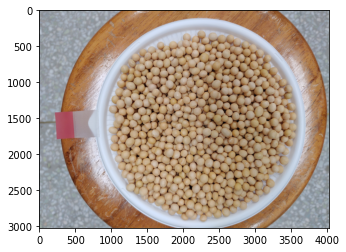

In [137]:
img_path = './Open/t28/5.jpg'
src=cv2.imread(img_path)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

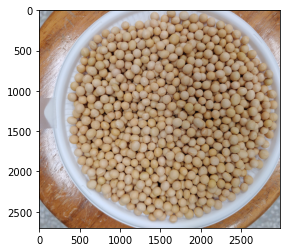

In [138]:
dst = bc.getAboveTargetImg(src) if bc.option==5 else bc.getSideTargetImg(src)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

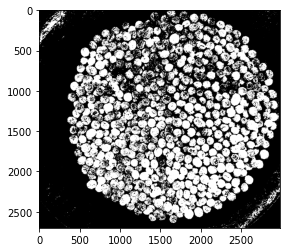

In [139]:
dst1 = bc.hsvRGB2Binary(dst)

plt.imshow(dst1)
plt.gray()

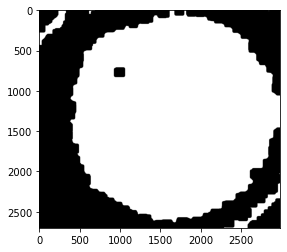

In [140]:
fg = bc.erasingNoise(dst1)
plt.imshow(fg)
plt.gray()

In [150]:
o_image_pixel_count_list = bc.getArea(o_image_path_list)
o_image_pixel_count_list

[454697130.0,
 462337185.0,
 558822045.0,
 582190755.0,
 377064165.0,
 188013795.0,
 926938515.0,
 789309660.0,
 697862070.0,
 696519240.0,
 421272750.0,
 866932170.0,
 1248048540.0,
 71697330.0,
 347521395.0,
 164919210.0,
 1211671515.0,
 732133050.0,
 648552210.0,
 546450720.0,
 410869260.0,
 516199560.0,
 236471190.0,
 189995655.0,
 1227499110.0,
 210517035.0,
 1193234760.0,
 1317856830.0,
 1173161415.0,
 1013231280.0]

In [154]:
bc.fittingModel(o_image_pixel_count_list, bc.open_count_label_path, 3)
bc.linear_model_fn

poly1d([ 9.08080050e-25, -2.47572501e-16, -2.70325169e-08,  2.56787496e+01])

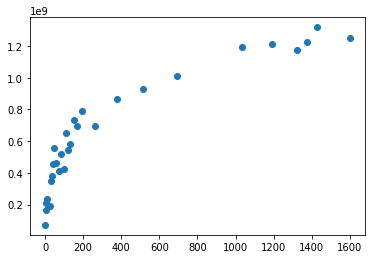

In [155]:
plt.scatter(bc.open_label, o_image_pixel_count_list)

In [156]:
t = np.array(range(2, 1601, 1))

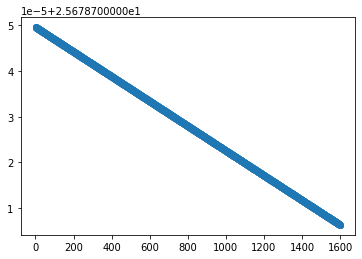

In [157]:
plt.scatter(t, bc.linear_model_fn(t))